In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nolds
from nolitsa import lyapunov,dimension,delay,noise,data

In [8]:
#Funcion util para encontrar minimos locales.
%matplotlib inline
def localmin(x):
    """Return all local minima from the given data set.
    Returns all local minima from the given data set.  Note that even
    "kinky" minima (which are probably not real minima) will be
    returned.
    Parameters
    ----------
    x : array
        1D scalar data set.
    Returns
    -------
    i : array
        Array containing location of all local minima.
    """
    return (np.diff(np.sign(np.diff(x))) > 0).nonzero()[0] + 1

In [9]:
#https://ourworldindata.org/coronavirus-source-data
data = pd.read_csv(r'C:\Users\javie\Desktop\pper\Data\owid-covid-data-01-08.csv')
df =pd.DataFrame(data)

In [39]:

#Belgica
Blegiumdata=df.loc[df['location']=='Belgium']
Belgiumts=np.array(Blegiumdata.new_cases_per_million).astype(float)/10

#Noruega
Norwaydata=df.loc[df['location']=='Norway']
Norwayts=np.array(Norwaydata.new_cases_per_million).astype(float)[1:]/10
# Norwayts=Norwayts[3:]

#Estados Unidos
USdata=df.loc[df['location']=='United States']
USts=np.array(USdata.new_cases_per_million).astype(float)[1:]/10
# USts=USts[1:]

#Chile
Chiledata=df.loc[df['location']=='Chile']
Chilets=np.array(Chiledata.new_cases_per_million).astype(float)/10

#Dinamarca
Denmarkdata=df.loc[df['location']=='Denmark']
Denmarkts=np.array(Denmarkdata.new_cases_per_million).astype(float)[25:]/10
# [11:]
# Denmarkts=Denmarkts[14:]

#Canada
Canadadata=df.loc[df['location']=='Canada']
Canadats=np.array(Canadadata.new_cases_per_million).astype(float)/10

#Republica Checa
CzechRdata=df.loc[df['location']=='Czech Republic']
CzechRts=np.array(CzechRdata.new_cases_per_million).astype(float)/10

#Nueva Zelanda
NZdata=df.loc[df['location']=='New Zealand']
NZts=np.array(NZdata.new_cases_per_million).astype(float)/10

#Alemania
Alemaniadata=df.loc[df['location']=='Germany']
Alemaniats=np.array(Alemaniadata.new_cases_per_million).astype(float)[3:]/10

#Italia
Italydata=df.loc[df['location']=='Italy']
Italiats=np.array(Italydata.new_cases_per_million).astype(float)/10

#Solo no se encuentra republica checa, quizas con otro nombre.
#Quitamos NZ también.

#AGREGAMOS NUEVA ZELANDA, JAPON, COREA DEL SUR, AUSTRALIA.

Japandata=df.loc[df['location']=='Japan']
Japants=np.array(Japandata.new_cases_per_million).astype(float)[1:]/10
# [1:]

SKdata=df.loc[df['location']=='South Korea']
SKts=np.array(SKdata.new_cases_per_million).astype(float)[2:]/10
# [2:]

Australiadata=df.loc[df['location']=='Australia']
Australiats=np.array(Australiadata.new_cases_per_million).astype(float)/10

In [40]:
Fechas=df['date'].astype(str).values.tolist()

In [41]:
Time_series=[Belgiumts,Norwayts,
             USts,Chilets,Denmarkts, 
             Alemaniats, Italiats,
             Japants, SKts, Australiats, NZts]
Paises=['Belgica', 'Noruega', 'Estados Unidos', 'Chile', 'Dinamarca', 'Alemania', 'Italia', 'Japon', 'Corea del Sur',
       'Australia','Nueva Zelanda']

In [42]:
N=11
L=250

In [43]:
TS=[]
for serie in Time_series:
    TS.append(serie[:L])

Minima of delayed mutual information = [ 6 17 21 28 33 36 44 48 56 58 65 69 71 74 81 83 85 91 93 97]
Autocorrelation time = 12


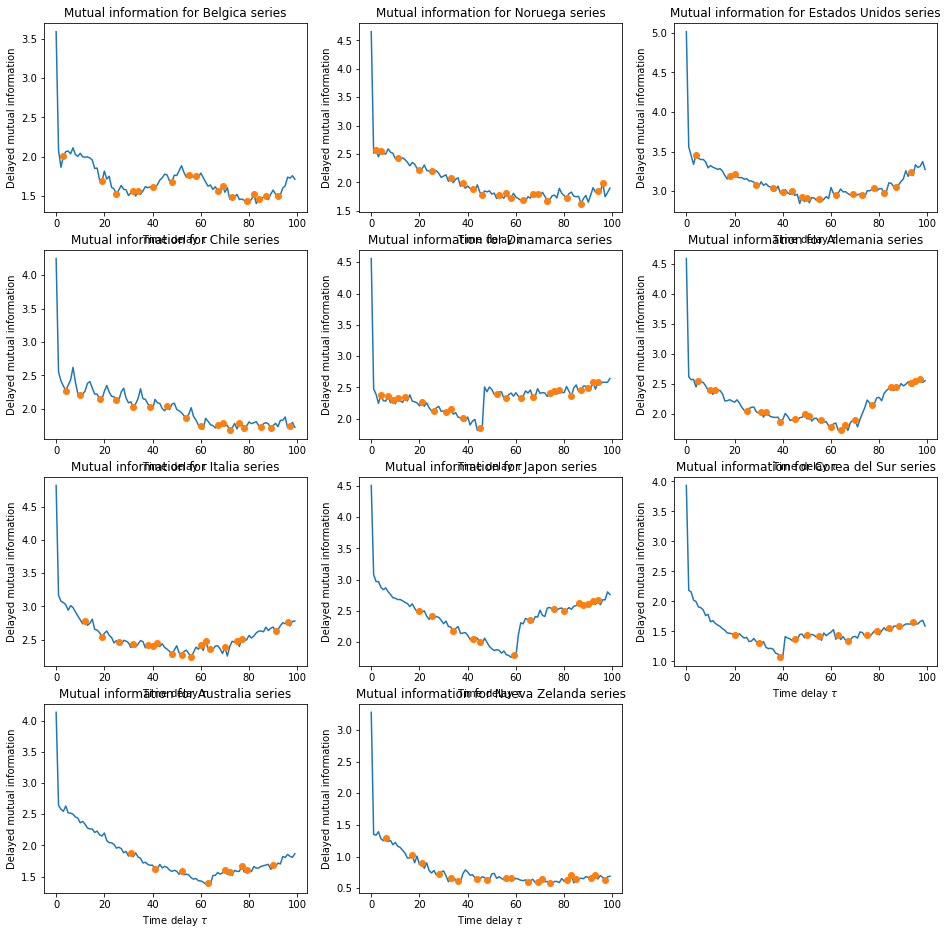

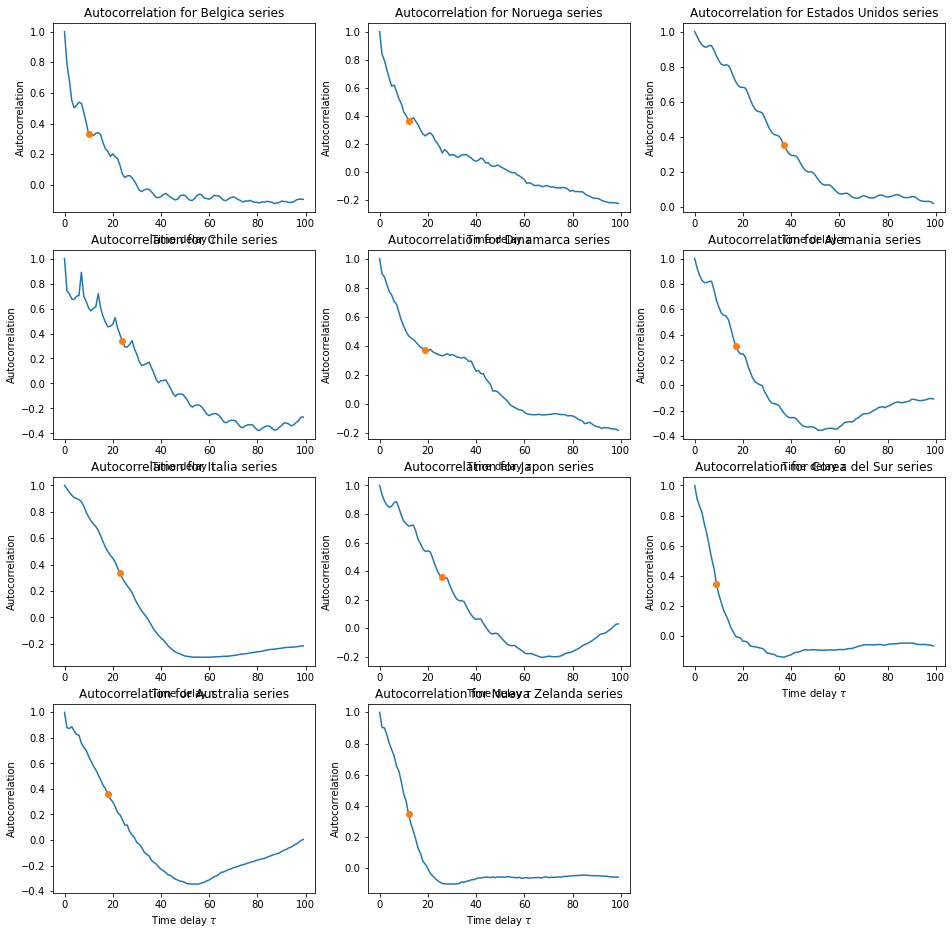

In [44]:
#Información Mutua.
# Compute autocorrelation and delayed mutual information.
lag = np.arange(100)
i_delay=np.zeros(N)
r_delay=np.zeros(N)
plt.figure(1,figsize=(16,16))
Minimals=np.zeros(N)
for j in range(N):
    x=TS[j]
    i = delay.dmi(x, maxtau=100)
    i_delay = localmin(noise.sma(i, hwin=1)) + 1
    plt.subplot(4,3,j+1)
    plt.title(r'Mutual information for ' + str(Paises[j]) +' series')
    plt.ylabel(r'Delayed mutual information')
    plt.xlabel(r'Time delay $\tau$')
    plt.plot(lag, i, i_delay, i[i_delay], 'o')
    Minimals[j]=i_delay[0]
print(r'Minima of delayed mutual information = %s' % i_delay)


#Autocorrelacion
Autocorrnumber=np.zeros(N)
plt.figure(2,figsize=(16,16))
for j in range(N):
    x=TS[j]
    r = delay.acorr(x, maxtau=100)
    r_delay = np.argmax(r < 1.0 / np.e)
    
    plt.subplot(4,3,j+1)
    plt.title(r'Autocorrelation for ' + str(Paises[j]) +' series')
    plt.xlabel(r'Time delay $\tau$')
    plt.ylabel(r'Autocorrelation')
    plt.plot(lag, r, r_delay, r[r_delay], 'o')
    Autocorrnumber[j]=r_delay
print(r'Autocorrelation time = %d' % r_delay)

In [45]:
Tau=Minimals
Theiler=Autocorrnumber*3

In [46]:
Tau

array([ 3.,  2.,  4.,  4.,  4.,  5., 12., 20., 20., 31.,  6.])

In [47]:
Theiler

array([ 30.,  36., 111.,  72.,  57.,  51.,  69.,  78.,  27.,  54.,  36.])

In [48]:
Tau[-2]=Tau[-3]=Tau[-4]=Tau[-5]=Tau[1]=5

In [49]:
Theiler[2]=Theiler[8]=Theiler[7]=72

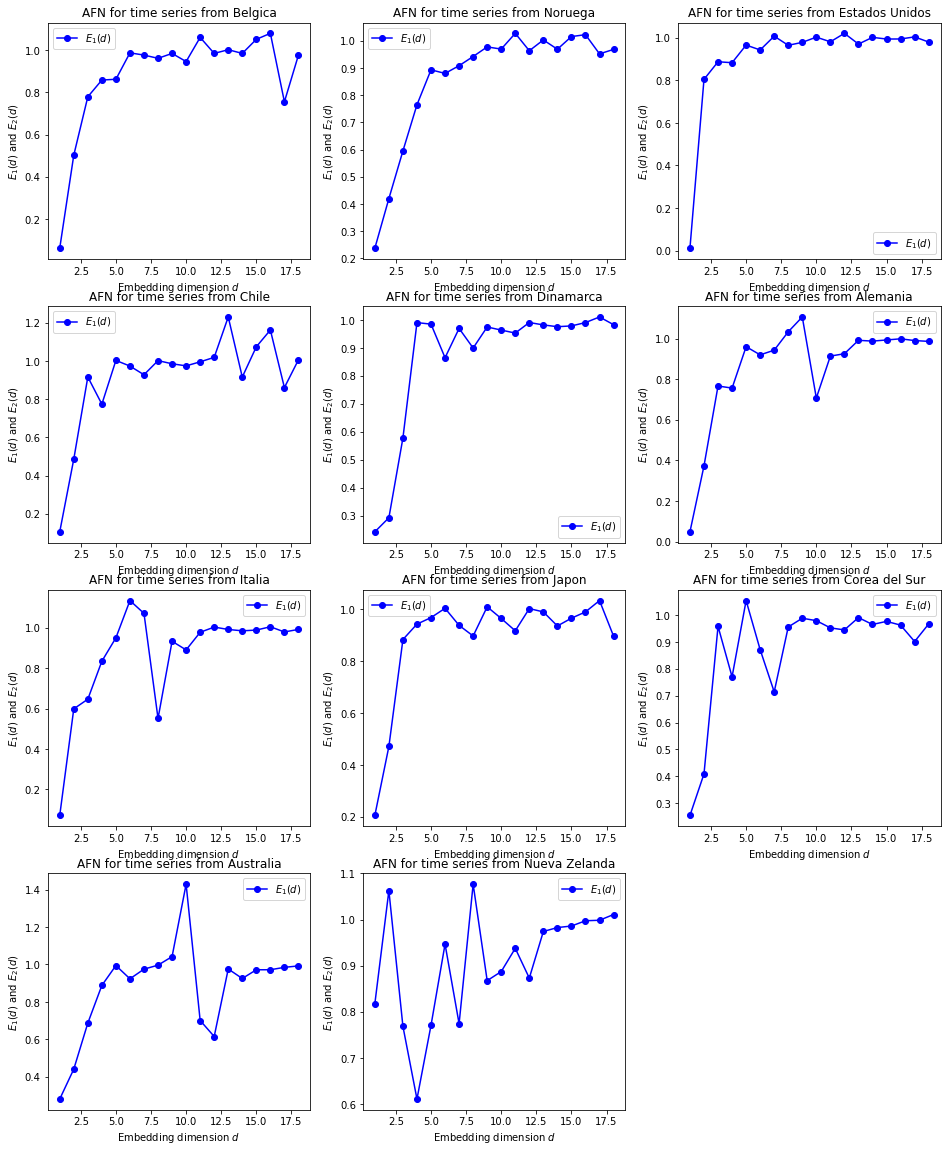

In [50]:
plt.figure(1,figsize=(16,20))
for i in range(N):
    X=TS[i]
    # AFN algorithm.
    dim = np.arange(1, 18 + 2)
    E, Es = dimension.afn(X, tau=int(Tau[i]), dim=dim, window=int(Theiler[i]),maxnum=int(Theiler[i]*2+3))
    E1, E2 = E[1:] / E[:-1], Es[1:] / Es[:-1]
    plt.subplot(4,3,1+i)
    plt.title(r'AFN for time series from '+Paises[i])
    plt.xlabel(r'Embedding dimension $d$')
    plt.ylabel(r'$E_1(d)$ and $E_2(d)$')
    plt.plot(dim[:-1], E1, 'bo-', label=r'$E_1(d)$')
    #plt.plot(dim[:-1], E2, 'go-', label=r'$E_2(d)$')
    plt.legend()
plt.show()

In [51]:
Embdim=[6,5,4,6,4,5,6,5,8,7,13]

In [52]:
def Lyapunov(X,tauu,d,theiler,maxnumb=None):
    MLEs_nolitsa=np.zeros(1)
    LEs=lyapunov.mle_embed(X, dim=[int(d)], tau=int(tauu), window=int(theiler), maxt=100, maxnum=maxnumb)[0]
    #sma=noise.sma(LEs[:40], hwin=0)
    sma=LEs[:40]
    p = np.polyfit(np.arange(len(sma)), sma,deg=1)
    xaxis = np.arange(len(sma))
    yaxis = p[1] + p[0] * xaxis
    MLEs_nolitsa[0]=p[0]
    return MLEs_nolitsa[0]*365

In [53]:
#Construyamos la lista de los diez vectores de longitudes diferentes, que sean compatibles con las fechas hasta la última 
#disponible.
Lyapse=[]
for k in range(N):
    Lyapse.append(np.zeros(len(Time_series[k])-250))


In [54]:
for j in range(N):
    for t in range(len(Lyapse[j])):
        Y=Time_series[j][t:250+t]
        Lyapse[j][t]=Lyapunov(Y,Tau[j],Embdim[j],Theiler[j],int(Theiler[j]*2+3))

In [55]:
#Hay que cambiar el xx por las fechas correspondientes, primero para esto hay que alinear todo.

# Cortando hasta desplazar 200 dias.

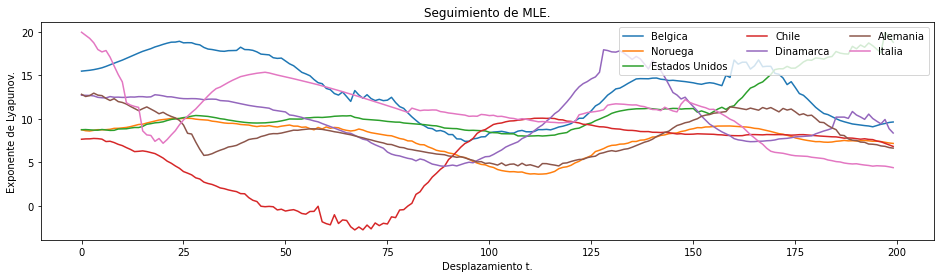

In [56]:
plt.figure(figsize=(16,4))
for k in range(7):
    plt.plot(Lyapse[k][:200])
plt.xlabel('Desplazamiento t.')
plt.ylabel('Exponente de Lyapunov.')
plt.title('Seguimiento de MLE.')
plt.legend(Paises,loc='upper right',ncol=3)
plt.show()

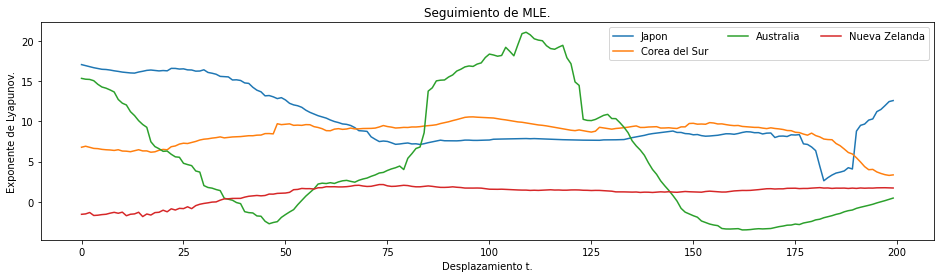

In [57]:
plt.figure(figsize=(16,4))
for k in range(7,N):
    plt.plot(Lyapse[k][:200])
plt.xlabel('Desplazamiento t.')
plt.ylabel('Exponente de Lyapunov.')
plt.title('Seguimiento de MLE.')
plt.legend(Paises[7:],loc='upper right',ncol=3)
plt.show()

# Seguimiento con fecha.

In [58]:
Paises=['Belgica', 'Noruega', 'Estados Unidos', 'Chile', 'Dinamarca', 'Alemania', 'Italia', 'Japon', 'Corea del Sur',
       'Australia','Nueva Zelanda']

In [59]:
FechasBelgica=Blegiumdata['date'].astype(str).values.tolist()
FechasNoruega=Norwaydata['date'].astype(str).values.tolist()[1:]
FechasUS=USdata['date'].astype(str).values.tolist()[1:]
FechasChile=Chiledata['date'].astype(str).values.tolist()
FechasDinamarca=Denmarkdata['date'].astype(str).values.tolist()[25:]
FechasCanada=Canadadata['date'].astype(str).values.tolist()
FechasCzechR=CzechRdata['date'].astype(str).values.tolist()
FechasNZ=NZdata['date'].astype(str).values.tolist()
FechasAlemania=Alemaniadata['date'].astype(str).values.tolist()
FechasItaliats=Italydata['date'].astype(str).values.tolist()
FechasJapan=Japandata['date'].astype(str).values.tolist()[1:]
FechasSK=SKdata['date'].astype(str).values.tolist()[2:]
FechasAustralia=Australiadata['date'].astype(str).values.tolist()

# Primer plot.

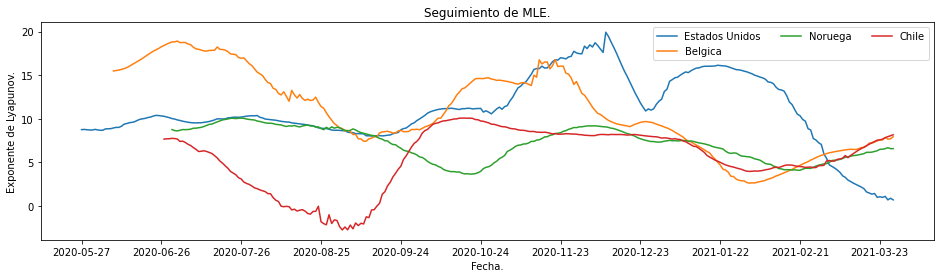

In [66]:
plt.figure(figsize=(16,4))
plt.plot(FechasUS[125:125+len(Lyapse[2])],Lyapse[2])
plt.plot(FechasBelgica[125:125+len(Lyapse[0])],Lyapse[0])
plt.plot(FechasNoruega[125:125+len(Lyapse[1])],Lyapse[1])
plt.plot(FechasChile[125:125+len(Lyapse[3])],Lyapse[3])
plt.xlabel('Fecha.')
plt.ylabel('Exponente de Lyapunov.')
plt.title('Seguimiento de MLE.')
plt.legend(['Estados Unidos','Belgica', 'Noruega',  'Chile'],loc='upper right',ncol=3)
plt.xticks([0,30,60,90,120,150,180,210,240,270,300])
plt.show()

# Segundo plot

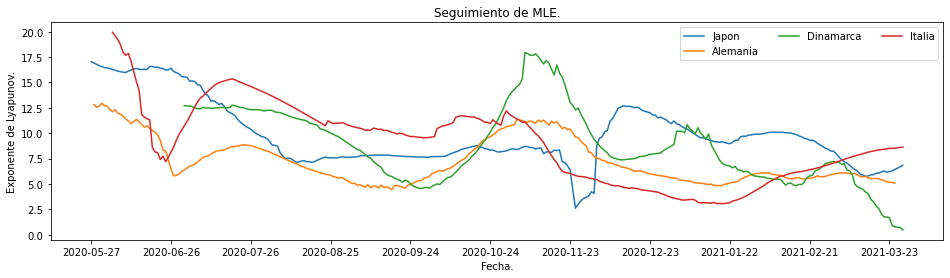

In [67]:
plt.figure(figsize=(16,4))
plt.plot(FechasJapan[125:125+len(Lyapse[7])],Lyapse[7])
plt.plot(FechasAlemania[125:125+len(Lyapse[5])],Lyapse[5])
plt.plot(FechasDinamarca[125:125+len(Lyapse[4])],Lyapse[4])
plt.plot(FechasItaliats[125:125+len(Lyapse[6])],Lyapse[6])

plt.xlabel('Fecha.')
plt.ylabel('Exponente de Lyapunov.')
plt.title('Seguimiento de MLE.')
plt.legend(['Japon','Alemania','Dinamarca','Italia'],loc='upper right',ncol=3)
plt.xticks([0,30,60,90,120,150,180,210,240,270,300])
plt.show()

# Tercer plot

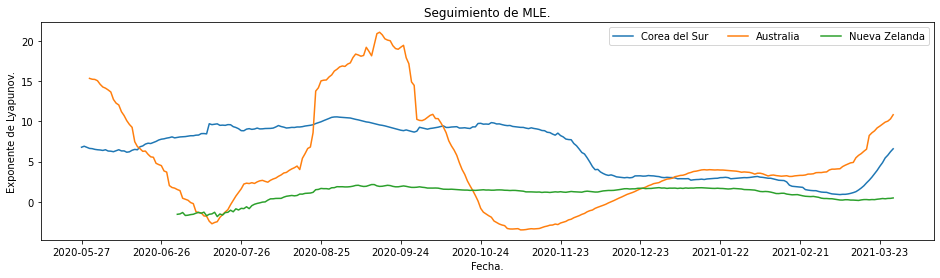

In [68]:
plt.figure(figsize=(16,4))
plt.plot(FechasSK[125:125+len(Lyapse[8])],Lyapse[8])
plt.plot(FechasAustralia[125:125+len(Lyapse[9])],Lyapse[9])
plt.plot(FechasNZ[125:125+len(Lyapse[10])],Lyapse[10])
plt.xticks([0,30,60,90,120,150,180,210,240,270,300])
plt.xlabel('Fecha.')
plt.ylabel('Exponente de Lyapunov.')
plt.title('Seguimiento de MLE.')
plt.legend(['Corea del Sur', 'Australia','Nueva Zelanda'],loc='upper right',ncol=3)
plt.show()

# Agrupando por Regiones

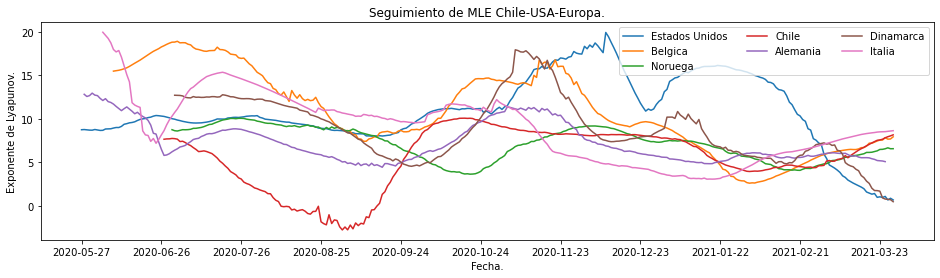

In [69]:
plt.figure(figsize=(16,4))
plt.plot(FechasUS[125:125+len(Lyapse[2])],Lyapse[2])
plt.plot(FechasBelgica[125:125+len(Lyapse[0])],Lyapse[0])
plt.plot(FechasNoruega[125:125+len(Lyapse[1])],Lyapse[1])
plt.plot(FechasChile[125:125+len(Lyapse[3])],Lyapse[3])
plt.plot(FechasAlemania[125:125+len(Lyapse[5])],Lyapse[5])
plt.plot(FechasDinamarca[125:125+len(Lyapse[4])],Lyapse[4])
plt.plot(FechasItaliats[125:125+len(Lyapse[6])],Lyapse[6])

plt.xlabel('Fecha.')
plt.ylabel('Exponente de Lyapunov.')
plt.title('Seguimiento de MLE Chile-USA-Europa.')
plt.legend(['Estados Unidos','Belgica', 'Noruega',  'Chile','Alemania', 'Dinamarca', 'Italia'],loc='upper right',ncol=3)
plt.xticks([0,30,60,90,120,150,180,210,240,270,300])
plt.show()

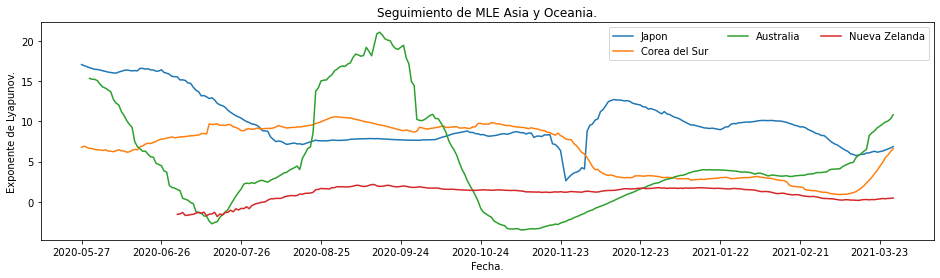

In [70]:
plt.figure(figsize=(16,4))
plt.plot(FechasJapan[125:125+len(Lyapse[7])],Lyapse[7])
plt.plot(FechasSK[125:125+len(Lyapse[8])],Lyapse[8])
plt.plot(FechasAustralia[125:125+len(Lyapse[9])],Lyapse[9])
plt.plot(FechasNZ[125:125+len(Lyapse[10])],Lyapse[10])
plt.xticks([0,30,60,90,120,150,180,210,240,270,300])
plt.xlabel('Fecha.')
plt.ylabel('Exponente de Lyapunov.')
plt.title('Seguimiento de MLE Asia y Oceania.')
plt.legend(['Japon','Corea del Sur', 'Australia','Nueva Zelanda'],loc='upper right',ncol=3)
plt.show()